In [3]:
import pandas as pd

In [18]:
df = pd.read_csv(r"C:\Users\vinna\OneDrive\AI ML Projects\V Projects\Revenue_Recognition_Project\data\processed_data.csv")
df

,delay_days,month,day_of_week,customer_type_enc,shipment_mode_enc,is_delayed
0,5,6,5,2,1,0
1,0,3,6,0,1,0
2,-3,12,6,2,1,0
3,8,8,6,2,1,0
4,-2,6,1,0,0,0
...,...,...,...,...,...,...
995,-1,10,4,1,0,0
996,-6,12,4,1,1,0
997,4,4,2,2,2,0
998,-8,9,2,2,1,0


In [9]:
!pip install shap


In [10]:
!pip install xgboost

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import shap

In [12]:
X = df.drop('is_delayed', axis=1)
y = df['is_delayed']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[178   9]
 [ 11   2]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       187
           1       0.18      0.15      0.17        13

    accuracy                           0.90       200
   macro avg       0.56      0.55      0.56       200
weighted avg       0.89      0.90      0.90       200



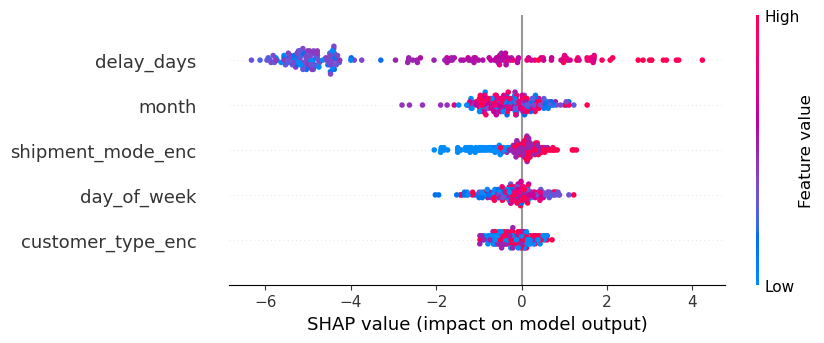

In [16]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)